# 그래프를 추천시스템에 어떻게 활용할까? (기본)

## 복습용 질문거리
- 우리 주변의 추천시스템
    - Amazon, 넷플릭스, 페이스북, 유튜브 등
- 내용 기반 추천시스템
    - 장점 : 새로운 상품에 대한 추천 가능
    - 단점 : 상품에 대한 부가 정보가 있는 경우에만 사용가능
- 협업 필터링
    - 장점 : 부가 정보가 없는 경우에도 사용 가능
    - 단점 : 새로운 상품에 대한 추천이 불가능
- 추천 시스템의 평가
    - 학습/평가 데이터 분리, 평균 제곱(근) 오차
- 실습 : 협업 필터링 구현
    - 데이터 불러오기 및 전처리
    - 취향의 유사도 계산
    - 점수 추정
    - 정확도 평가

## 강의소개
- 넷플릭스와 유투브의 컨텐츠 추천, 아마존의 상품 추천 등 우리는 일상생활 속 다양한 곳에서 추천 시스템을 사용
- 내용 기반 추천(contents based recommendation')
    - 아이템의 내용을 사용해 추천해주는
- 협업 필터링(collaborative filtering)
    - 유저와 아이템간의 유사도를 통해 추천
- 장단점에 집중!!

---
## 우리 주변의 추천 시스템
- 아마존 상품추천
    - 고객 맞춤형 상품 목록
    <img src="./pic/1.png" alt="Drawing" style="width: 600px;"/>
    - 함께 혹은 대신 구매할 상품 목록
- 넥플릭스 영화추천
    - 고객 맞춤형 영화 목록
- 유튜브 영상 추천
    - 고객 맞춤형 영상 목록
    - 관련 영상 목록
- 페이스북 친구 추천
    - 상품을 추천한다고 가정
- 추천 시스템과 그래프
    - 사용자 각각이 구매할 만한 혹은 선호할 만한 상품 추천
    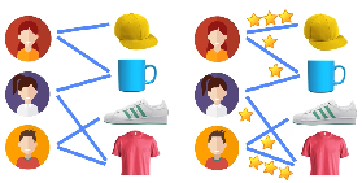
    - 사용자 구매를 예측 및 선호를 추정하는 것

---
## 내용 기반 추천시스템
- 원리
    - 각 사용자가 구매/만족했던 상품과 유사한것을 추천
    - ex) 동일감독, 동일 장르, 동일 배우, 동일 카테고리, 같은 학교 졸업한 사람 추천
- 단계 (4단계)
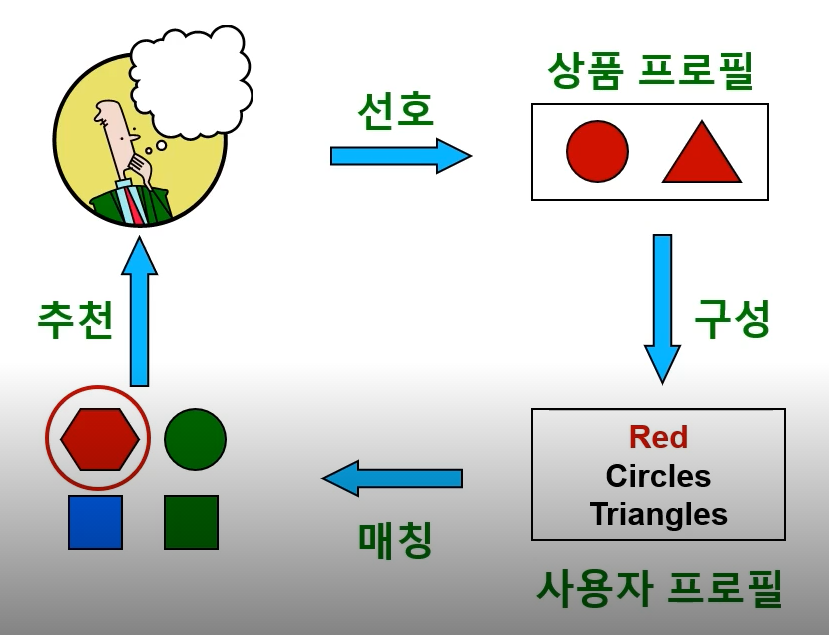
    1. 상품 프로필 수집
        - 원핫 인코딩으로
        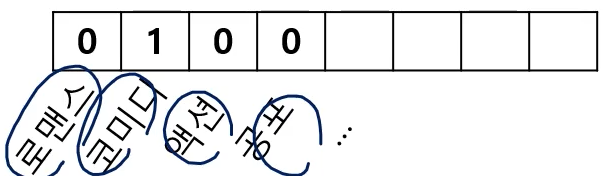
    2. 사용자 프로필(User Profile) 구성
        - 벡터로 표현하는데
            - 선호도를 반영하여 가중 평균을 함 (어떤 영화를 더 좋아하면 거기는 가중치를 줌)
            - 사용자가 선호하는 상품이 집약된 벡터
        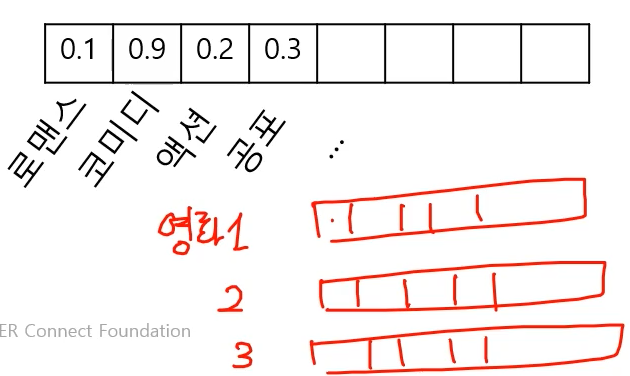
    3. 사용자 프로필과 다른 상품들의 상품 프로필을 매칭하는 단계
        - 코사인 유사도를 통해 예측
        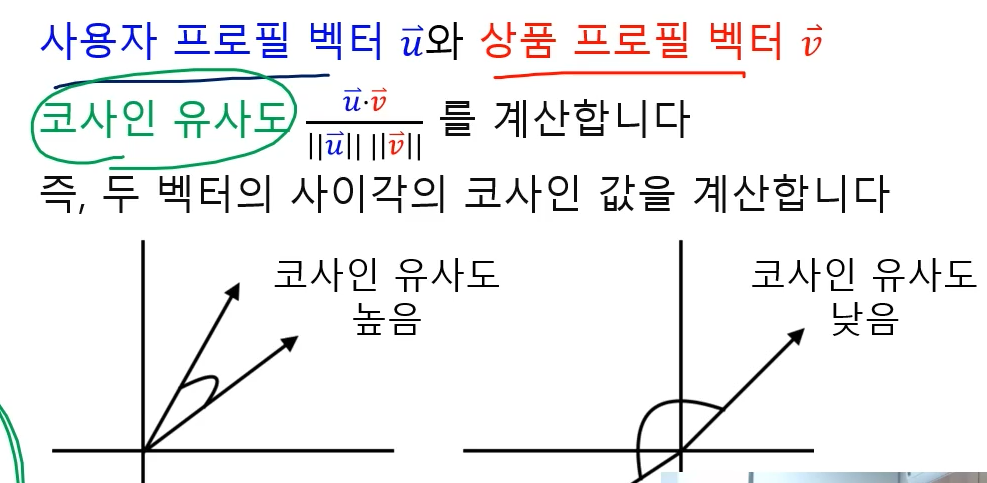
    4. 코사인 유사도가 높은 상품들을 추천함

- 장단점
    - 장점
        - 다른사용자의 구매기록이 필요하지 않음
        - 독특한 취향의 사용자엗게도 추천이 가능함
        - 새상품에 대해서도 추천이 가능함
        - 추천의 이유를 제공할 수 있음  
          : ex) 당신이 로맨스 영화를 선호했기 때문에 새로운 로맨스 영화를 추천합니다.
    - 단점
        - 상품에 대한 부가정보가 없으면 사용할 수 없음
        - 구매기록이 없는 사용자에게는 사용할 수 없음
        - 과적합으로 인해 지나치게 협소한 추천을 할 수 있음  
          : ex) 우연히 로멘스 영화 2번 봤다면 계속 그것만 추천할 수 있음

---
## 협업 필터링 추천시스템
- 사용자-사용자 협업 필터링은 다음 세단계로 이루어짐
    1. 추천 대상과 유사한 사용자 찾기
    2. 유사 취향 사용자가 선호한 상품 찾기
    3. 이 상품을 추천
- 핵심 취향의 유사도를 어떻게 계산할까?
    - 지수와 제니가 제니와 로제보다 유사하다는 것은 보면 알 수 있음
    - 취향의 유사도는 상관 계수를 통해 측정함
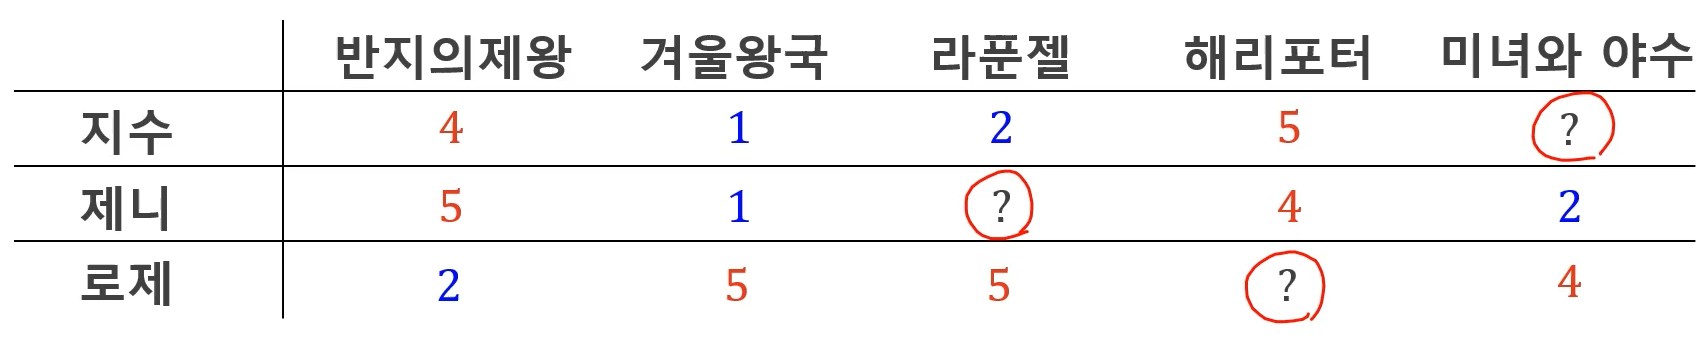
    - 아래 식에서 위쪽은 같은 항목에 대해 평균보다 서로 높게주면 높게 나옴
    - 아래 식에서 아래쪽은 정규화를 시켜서 -1~1 사이의 값을 갖도록 함
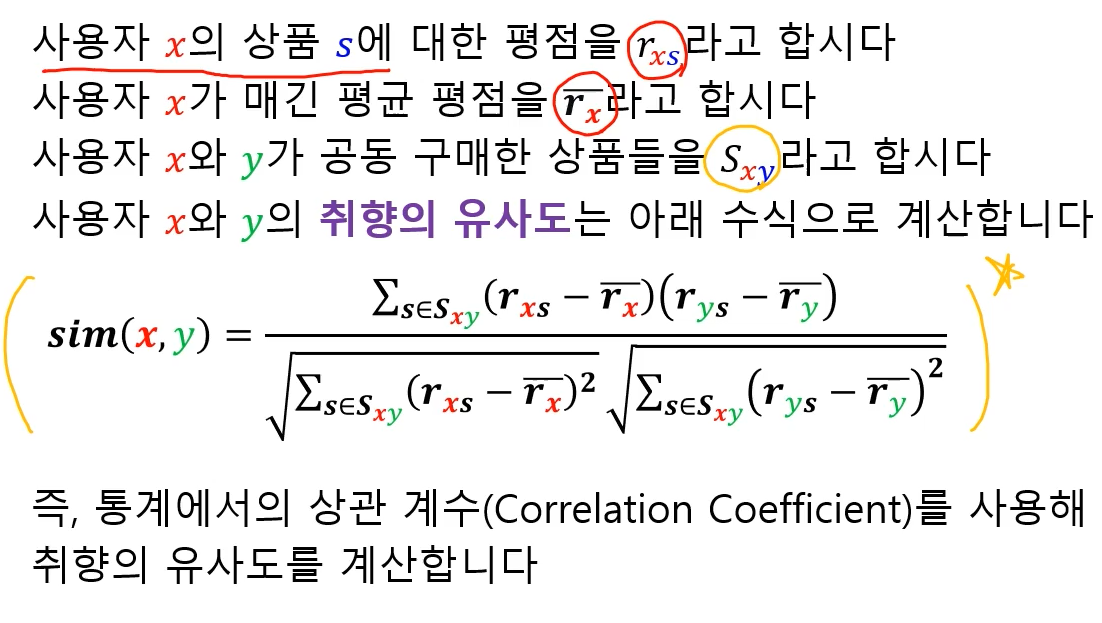
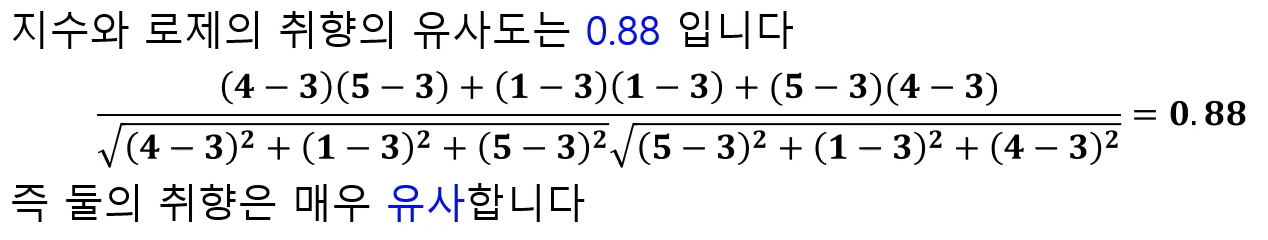
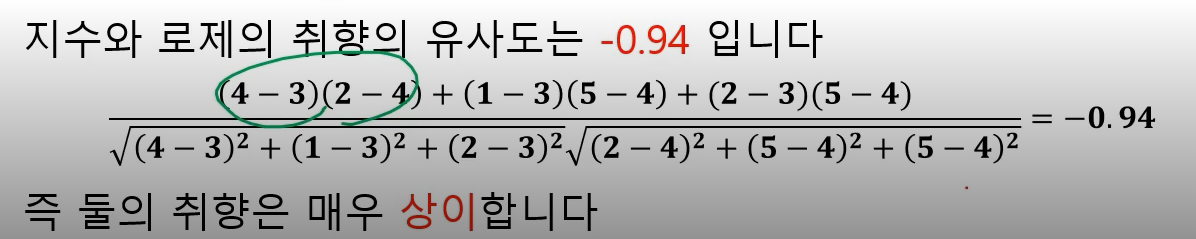
- 조금더 상세히 보자
    - 취향의 유사도를 가중치로 사용한 평점의 가중 평균을 통해 평점을 추정함
    - 아래 과정을 거친 뒤, 추정 평점이 가장 높은 상품을 추천함
    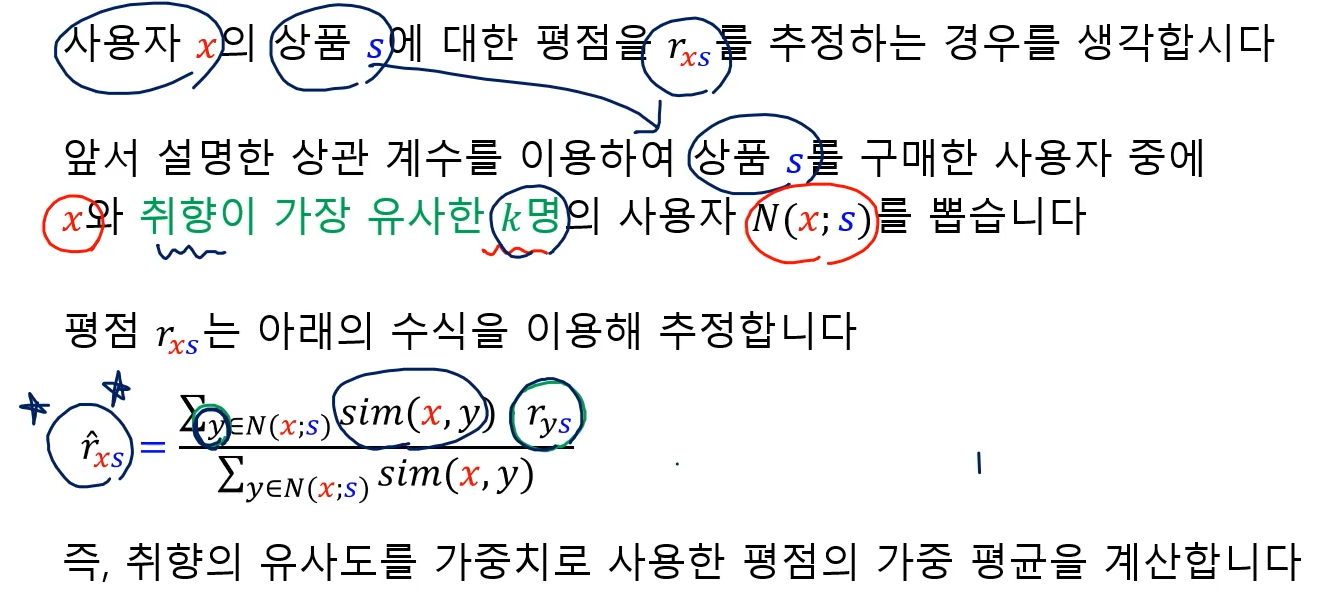
    
- 장단점
    - 장점
        - 부가 정보가 없는 경우 사용 가능
    - 단점
        - 충분한 수의 평점 데이터가 누적되어야 효과
        - 새 상품, 새로운 사용자에 대한 추천 불가능
        - 독특한 취향의 사용자에게 추천이 어려움

---
## 추천 시스템의 평가
- 데이터 분리
    - 정확도는 어떻게 평가할까?
        - Training과 Test 데이터로 나눔
        - TEST쪽을 추정해보고 비교해봄
            - 비교에 쓰는것?
                - 평균 제곱 오차(Mean Squared Error, MSE)
                - 평균 제곱근 오차(Root Mean Squared Error, RMSE)
                - 상관계수나 다른 것도 사용할 수 있음 여러가지가 있음
        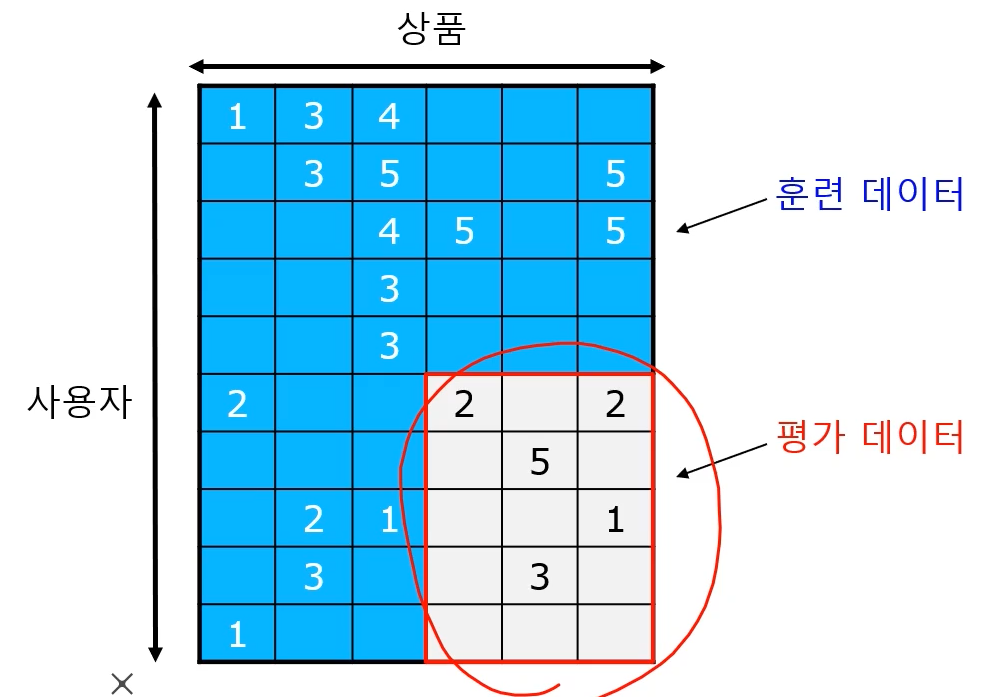
        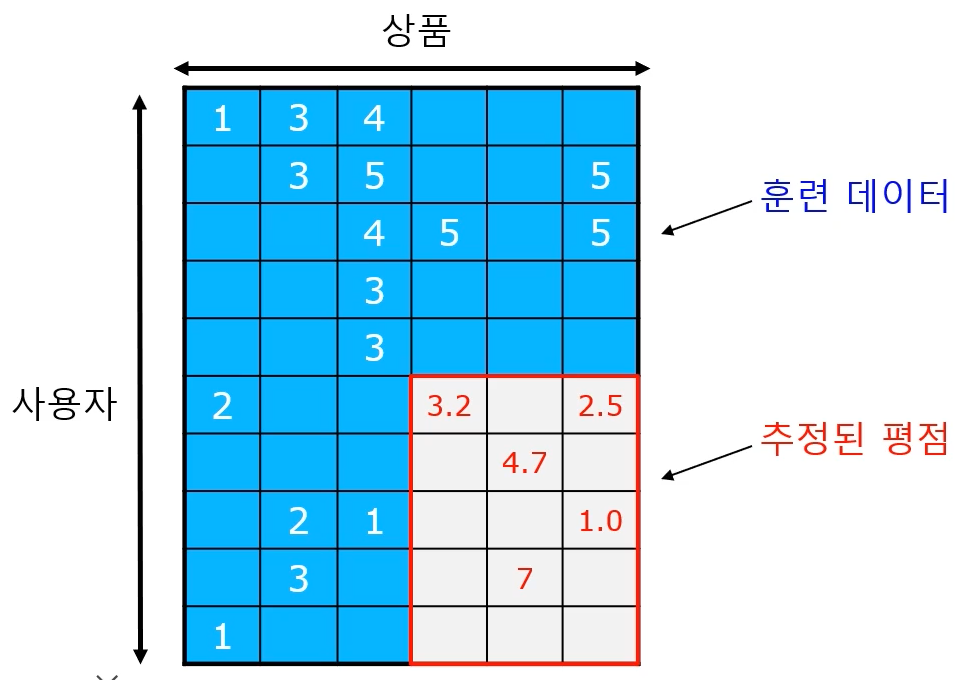